In [1]:
import torch
import pytorch3d
import numpy as np
import matplotlib.pyplot as plt

In [16]:
tensor = torch.randn(33,257,257)

In [10]:
import pytorch3d.transforms
pytorch3d.transforms.euler_angles_to_matrix(torch.tensor([np.pi/2, np.pi/2, np.pi/2]), "XYZ")

tensor([[ 1.9107e-15,  4.3711e-08,  1.0000e+00],
        [-8.7423e-08, -1.0000e+00,  4.3711e-08],
        [ 1.0000e+00, -8.7423e-08,  1.9107e-15]])

In [25]:
z_dims, y_dims, x_dims = tensor.shape
z_dims, y_dims, x_dims = torch.arange(z_dims).float()/z_dims,torch.arange(y_dims).float()/y_dims,torch.arange(x_dims).float()/x_dims

z_dims, y_dims, x_dims = z_dims[None, :, None, None].expand(1, *tensor.shape), y_dims[None, None, :, None].expand(1, *tensor.shape), x_dims[None, None, None, :].expand(1, *tensor.shape)

In [18]:
z_dims.shape

torch.Size([1, 33, 257, 257])

In [35]:
grid = torch.stack([z_dims,y_dims,x_dims], dim=4)

In [36]:
grid.shape

torch.Size([1, 33, 257, 257, 3])

In [15]:
rot_mat = pytorch3d.transforms.euler_angles_to_matrix(torch.tensor([np.pi/2, np.pi/2, np.pi/2]), "XYZ")

In [37]:
rot_grid = torch.einsum('n z y x d, d d -> n z y x d', grid, rot_mat)

In [47]:
grid[0,10,10,10]

tensor([0.3030, 0.0389, 0.0389])

In [46]:
rot_grid[0,10,10,10] * torch.tensor([33, 257, 257])

tensor([ 1.9107e-14, -1.0000e+01,  1.9107e-14])

In [43]:
import torch.nn.functional as F

rot_tensor = F.grid_sample(tensor.unsqueeze(0).unsqueeze(0), rot_grid)

# GT Labels

In [1]:
import torch
import pytorch3d
import pytorch3d.transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import imageio
gt_labels = imageio.volread('/n/home11/abanerjee/pytorch_connectomics/datasets/SNEMI3D/train-labels.tif')

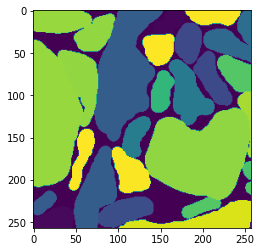

In [2]:
sub_labels = gt_labels[:33, :257, :257]
plt.imshow(sub_labels[0])

In [13]:
z_dims, y_dims, x_dims = sub_labels.shape
z_dims, y_dims, x_dims = 2*(torch.arange(z_dims).float()/z_dims) - 1, \
                         2*(torch.arange(y_dims).float()/y_dims) - 1, \
                         2*(torch.arange(x_dims).float()/x_dims) - 1

z_dims, y_dims, x_dims = z_dims[None, :, None, None].expand(1, *sub_labels.shape), \
                         y_dims[None, None, :, None].expand(1, *sub_labels.shape), \
                         x_dims[None, None, None, :].expand(1, *sub_labels.shape)

grid = torch.stack([z_dims,y_dims,x_dims], dim=4)

In [9]:
rot_mat = pytorch3d.transforms.euler_angles_to_matrix(torch.tensor([np.pi/2, 0, 0]), "ZYX")
rot_mat

tensor([[-4.3711e-08, -1.0000e+00,  0.0000e+00],
        [ 1.0000e+00, -4.3711e-08,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.0000e+00]])

In [20]:
rot_mat = pytorch3d.transforms.axis_angle_to_matrix(torch.tensor([np.pi/2, 0, 0]))
rot_mat

tensor([[ 1.,  0.,  0.],
        [ 0.,  0., -1.],
        [ 0.,  1.,  0.]])

In [21]:
torch.matmul(torch.Tensor([2,4,0]).view(1,3), rot_mat)

tensor([[ 2.,  0., -4.]])

In [27]:
torch.matmul(torch.Tensor([-1,-1,-1]).view(1,3), rot_mat)

tensor([[-1., -1.,  1.]])

In [35]:
torch.matmul(torch.Tensor([-1,-0.9255,-0.9255]).view(1,3), rot_mat)

tensor([[-1.0000, -0.9255,  0.9255]])

In [28]:
rot_grid = torch.matmul(grid.view(-1, 3), rot_mat)
rot_grid = rot_grid.view(*grid.shape)

In [54]:
# rot_grid = torch.einsum('n z y x d, d d -> n z y x d', grid, rot_mat)
rot_tensor = F.grid_sample(torch.tensor(np.cast[np.int16](sub_labels)==332).float().unsqueeze(0).unsqueeze(0), rot_grid).squeeze().int()

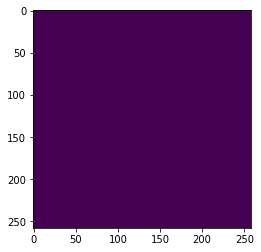

In [55]:
plt.imshow(rot_tensor[0],vmin=0,vmax=394)

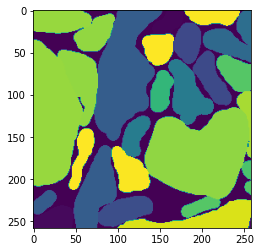

In [17]:
sub_tensor = torch.tensor(np.cast[np.int16](sub_labels)).float()
plt.imshow(sub_tensor[0])

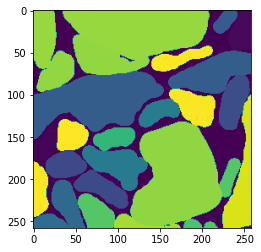

In [40]:
sub_tensor_perm = sub_tensor.permute(0, 2, 1)
plt.imshow(sub_tensor_perm[0])

In [57]:
F.rotate

AttributeError: module 'torch.nn.functional' has no attribute 'rotate'

In [41]:
sub_tensor_perm - rot_tensor

tensor([[[ 292.,  250.,  250.,  ...,  -14.,  -14.,  -14.],
         [ 281.,  228.,  228.,  ...,  -21.,  -21.,  -21.],
         [ 270.,  206.,  206.,  ...,  -27.,  -27.,  -27.],
         ...,
         [  68.,   -7.,   -7.,  ...,  366.,   -4.,   -4.],
         [  79.,   15.,   15.,  ...,   -3.,   -3.,   -3.],
         [  90.,   37.,   37.,  ...,    7.,    7.,    7.]],

        [[ 250.,  167.,  167.,  ...,  -39.,  -39.,  -39.],
         [ 228.,  123.,  123.,  ...,  -52.,  -52.,  -52.],
         [ 206.,   79.,   79.,  ...,  -65.,  -65.,  -65.],
         ...,
         [  -7., -156., -156.,  ...,    2.,    2.,    2.],
         [  15., -112., -112.,  ...,    3.,    3.,    3.],
         [  37.,  -68.,  -68.,  ...,    4.,    4.,    4.]],

        [[ 250.,  167.,  167.,  ...,  -39.,  -39.,  -39.],
         [ 228.,  123.,  123.,  ...,  -52.,  -52.,  -52.],
         [ 206.,   79.,   79.,  ...,  -65.,  -65.,  -65.],
         ...,
         [-149., -298., -298.,  ...,    2.,    2.,    2.],
         [

In [18]:
sub_tensor.min(), sub_tensor.max()

(tensor(0.), tensor(394.))

In [24]:
rot_grid[0, 0, 0, 0]

tensor([-1., -0., -0.])

In [29]:
rot_grid[0, 0, 0, 0]

tensor([-1., -1.,  1.])

In [26]:
rot_grid[0, 0, 10, 10]

tensor([-1., -0., -0.])

In [33]:
rot_grid[0, 0, 10, 10]

tensor([-1.0000, -0.9225,  0.9225])

In [25]:
grid[0,0,0,0]

tensor([-1., -1., -1.])

In [34]:
grid[0,0,10,10]

tensor([-1.0000, -0.9225, -0.9225])

In [69]:
rot_tensor.unique()

tensor([  0.,  65., 164., 328.])

In [120]:
z_dims, y_dims, x_dims = sub_labels.shape
x_dims, y_dims, z_dims = 2*(torch.arange(x_dims).float()/x_dims) - 1, \
                         2*(torch.arange(y_dims).float()/y_dims) - 1, \
                         2*(torch.arange(z_dims).float()/z_dims) - 1
# z_dims, y_dims, x_dims = torch.arange(z_dims).float(), \
#                          torch.arange(y_dims).float(), \
#                          torch.arange(x_dims).float()
x_dims, y_dims, z_dims = torch.meshgrid(x_dims, y_dims, z_dims)

In [4]:
z_dims.shape

torch.Size([33, 257, 257])

In [121]:
grid = torch.stack([x_dims,y_dims,z_dims], dim=3).unsqueeze(0)

In [103]:
grid.shape

torch.Size([1, 257, 257, 33, 3])

In [8]:
grid[0,0,0,0]

tensor([-1., -1., -1.])

In [10]:
rot_grid = torch.matmul(grid.view(-1, 3), rot_mat)
rot_grid = rot_grid.view(*grid.shape)

In [119]:
rot_grid

tensor([[[[[-1.0000, -1.0000,  1.0000],
           [-1.0000, -0.9922,  1.0000],
           [-1.0000, -0.9844,  1.0000],
           ...,
           [-1.0000, -0.7665,  1.0000],
           [-1.0000, -0.7588,  1.0000],
           [-1.0000, -0.7510,  1.0000]],

          [[-1.0000, -1.0000,  0.9922],
           [-1.0000, -0.9922,  0.9922],
           [-1.0000, -0.9844,  0.9922],
           ...,
           [-1.0000, -0.7665,  0.9922],
           [-1.0000, -0.7588,  0.9922],
           [-1.0000, -0.7510,  0.9922]],

          [[-1.0000, -1.0000,  0.9844],
           [-1.0000, -0.9922,  0.9844],
           [-1.0000, -0.9844,  0.9844],
           ...,
           [-1.0000, -0.7665,  0.9844],
           [-1.0000, -0.7588,  0.9844],
           [-1.0000, -0.7510,  0.9844]],

          ...,

          [[-1.0000, -1.0000, -0.9767],
           [-1.0000, -0.9922, -0.9767],
           [-1.0000, -0.9844, -0.9767],
           ...,
           [-1.0000, -0.7665, -0.9767],
           [-1.0000, -0.7588, -0.9

In [12]:
grid

tensor([[[[[-1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -0.9922],
           [-1.0000, -1.0000, -0.9844],
           ...,
           [-1.0000, -1.0000,  0.9767],
           [-1.0000, -1.0000,  0.9844],
           [-1.0000, -1.0000,  0.9922]],

          [[-1.0000, -0.9922, -1.0000],
           [-1.0000, -0.9922, -0.9922],
           [-1.0000, -0.9922, -0.9844],
           ...,
           [-1.0000, -0.9922,  0.9767],
           [-1.0000, -0.9922,  0.9844],
           [-1.0000, -0.9922,  0.9922]],

          [[-1.0000, -0.9844, -1.0000],
           [-1.0000, -0.9844, -0.9922],
           [-1.0000, -0.9844, -0.9844],
           ...,
           [-1.0000, -0.9844,  0.9767],
           [-1.0000, -0.9844,  0.9844],
           [-1.0000, -0.9844,  0.9922]],

          ...,

          [[-1.0000,  0.9767, -1.0000],
           [-1.0000,  0.9767, -0.9922],
           [-1.0000,  0.9767, -0.9844],
           ...,
           [-1.0000,  0.9767,  0.9767],
           [-1.0000,  0.9767,  0.9

In [22]:
sub_tensor = torch.tensor(np.cast[np.int16](sub_labels)).float().unsqueeze(0).unsqueeze(0)/394
rot_tensor = F.grid_sample(sub_tensor, rot_grid).squeeze()

In [24]:
rot_tensor *= 394 
rot_tensor = rot_tensor.int()

In [30]:
rot_tensor[0].unique()

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

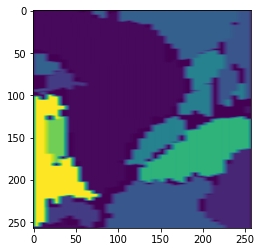

In [25]:
plt.imshow(rot_tensor[0])

In [31]:
vol = imageio.volread('/n/home11/abanerjee/pytorch_connectomics/datasets/SNEMI3D/train-input.tif')

In [83]:
vol_tensor = torch.tensor(vol[:33,:257,:257])/255

In [84]:
vol_tensor = vol_tensor.unsqueeze(0).unsqueeze(0)

In [58]:
rot_mat = pytorch3d.transforms.axis_angle_to_matrix(torch.tensor([0, 0, np.pi/2]))
rot_mat

tensor([[ 0., -1.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  0.,  1.]])

In [113]:
rot_mat = pytorch3d.transforms.euler_angles_to_matrix(torch.tensor([np.pi/2, 0, 0]), "XYZ")
rot_mat

tensor([[ 1.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -4.3711e-08, -1.0000e+00],
        [ 0.0000e+00,  1.0000e+00, -4.3711e-08]])

In [122]:
rot_grid = torch.matmul(grid.view(-1, 3), rot_mat)
rot_grid = rot_grid.view(*grid.shape)

In [123]:
rot_tensor = F.grid_sample(vol_tensor.permute(0,1,3,4,2), rot_grid).squeeze().permute(2,0,1)

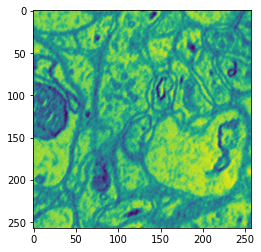

In [85]:
plt.imshow(vol_tensor.squeeze()[0])

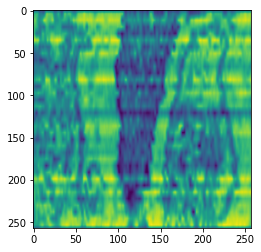

In [124]:
plt.imshow(rot_tensor[0])

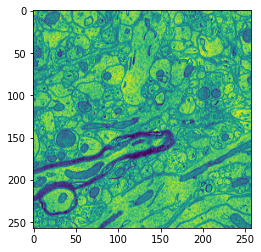

In [71]:
plt.imshow(rot_tensor[0])

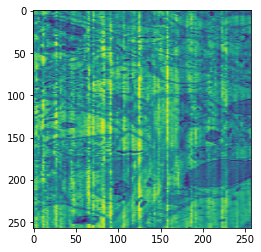

In [76]:
plt.imshow(rot_tensor[0])

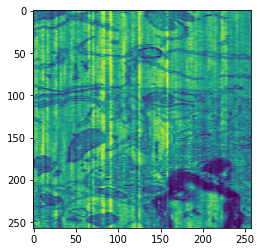

In [79]:
plt.imshow(rot_tensor[0])

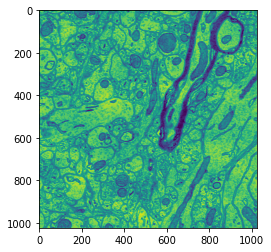

In [47]:
plt.imshow(vol_tensor.squeeze().permute(0,2,1).numpy()[:,::-1,:][0])

## Tf

In [1]:
import torch
import torchvision.transforms.functional as tf
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import imageio
arr = imageio.volread('/n/home11/abanerjee/pytorch_connectomics/datasets/SNEMI3D/train-input.tif')
arr = torch.tensor(arr)

### Z-axis rotation

In [2]:
arr = torch.stack([arr,arr])
c,z,y,x = arr.shape
arr = arr.reshape(1,c*z,y,x)

In [3]:
arr_rot = tf.rotate(arr,90)

In [4]:
arr_rot = arr_rot.reshape(c,z,y,x)

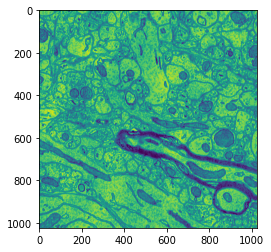

In [7]:
arr = arr.reshape(c,z,x,y)
plt.imshow(arr[0,0])

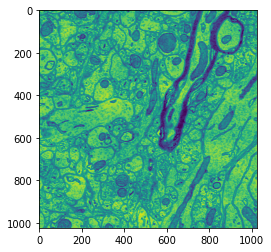

In [6]:
plt.imshow(arr_rot[0,0])

### Y-axis rotation

In [28]:
# use einops for reshape
c,z,y,x = arr.shape
arr_rot = tf.rotate(arr.permute(0,2,1,3).reshape(1,c*y,z,x), 180)
arr_rot = arr_rot.reshape(c,y,z,x).permute(0,2,1,3)
arr_rot.shape

torch.Size([2, 100, 1024, 1024])

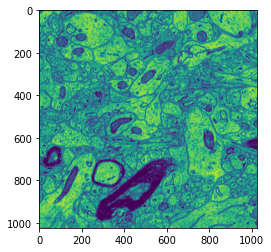

In [29]:
plt.imshow(arr_rot[0,0])

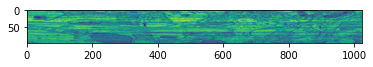

In [17]:
plt.imshow(arr[0,:,0,:])

In [18]:
sub_arr = arr[:,:33,:257,:257]
c,z,y,x = sub_arr.shape

In [21]:
arr_rot = torch.zeros((2, 257, 257, 257))
arr_rot[:,:z,:y,:x] = sub_arr

In [23]:
arr_rot = tf.rotate(arr_rot.permute(0,2,1,3).reshape(1,c*y,y,x), 90)

In [24]:
arr_rot = arr_rot.reshape(c,y,y,x).permute(0,2,1,3)

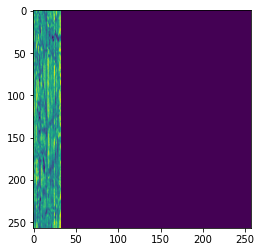

In [25]:
plt.imshow(arr_rot[0,0])

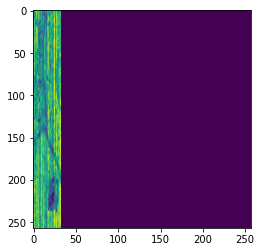

In [26]:
plt.imshow(arr_rot[0,:,0,:])

# Augmentation trial

In [1]:
import torch
import torchvision.transforms.functional as tf
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import imageio
gt_labels = imageio.volread('/n/home11/abanerjee/pytorch_connectomics/datasets/SNEMI3D/train-labels.tif')[:33, -257:, :257]
gt_labels = torch.tensor(np.cast[np.int16](gt_labels))
arr = imageio.volread('/n/home11/abanerjee/pytorch_connectomics/datasets/SNEMI3D/train-input.tif')[:33, -257:, :257]
arr = torch.tensor(arr)

In [4]:
(arr/255).mean(), (arr/255).std()

(tensor(0.5646), tensor(0.1758))

In [90]:
gt_labels.dtype

torch.int16

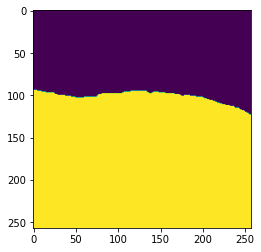

In [2]:
plt.imshow(gt_labels[0]==1)

In [2]:
index = 1
index_label = gt_labels==index
index_label = index_label.unsqueeze(0)

In [64]:
# y-rotate
c,z,y,x = index_label.shape
index_label_flipped = index_label[:,torch.arange(z-1,-1,-1)]

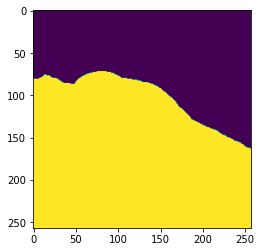

In [65]:
plt.imshow(index_label_flipped[0,0])

In [11]:
index_label_flipped.shape

torch.Size([1, 33, 257, 257])

In [19]:
index_label_flipped[0].any(dim=1).any(dim=0)

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

In [20]:
index_label_flipped[0].any(dim=2).any(dim=0)

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

In [32]:
*torch.where(index_label_flipped[0].any(dim=2).any(dim=0))[0][[0,-1]],*torch.where(index_label_flipped[0].any(dim=2).any(dim=0))[0][[0,-1]]

(tensor(68), tensor(256), tensor(68), tensor(256))

In [34]:
torch.randn(10,10)[:,11:].sum()

tensor(0.)

In [67]:
def rotate(tensor, angle):
    c,z,y,x = tensor.shape
    rotated = tf.rotate(tensor.reshape(1,c*z,y,x), angle)
    return rotated.reshape(c,z,y,x)

def crop_overlap(rot_label, gt, border=5):
    y_any = gt.any(dim=2).any(dim=0)
    x_any = gt.any(dim=1).any(dim=0)
    x1,x2,y1,y2 = *torch.where(x_any)[0][[0,-1]], *torch.where(y_any)[0][[0,-1]]
    x1,x2,y1,y2 = torch.clamp(x1-border,min=0),x2+border,torch.clamp(y1-border,min=0),y2+border
    
    return_dict = {}
    return_dict[rot_label[...,:x1].int().sum()] = [slice(None,None), slice(None,x1)]
    return_dict[rot_label[...,x2:].int().sum()] = [slice(None,None), slice(x2,None)]
    return_dict[rot_label[...,:y1].int().sum()] = [slice(None,y1), slice(None,None)]
    return_dict[rot_label[...,y2:].int().sum()] = [slice(y2,None), slice(None,None)]
    raise ValueError()
    return return_dict[max(return_dict.keys())]
    
def _name(rot_label, neuron_tensor):
    # return rotate, crop, id(0or1)
    gt = rot_label[0]
    min_overlap = torch.logical_and(rot_label[1] , gt).int().sum()
    rot_angle, crop, ind = 0, [slice(None,None), slice(None,None)], 1 
    for angle in range(30, 361, 30):
        rotated = rotate(rot_label, angle)
        overlap0, overlap1 = torch.logical_and(rotated[0] , gt).int().sum(), \
                    torch.logical_and(rotated[1] , gt).int().sum()
        if min(min_overlap, overlap0, overlap1) == min_overlap:
            continue
        elif min(min_overlap, overlap0, overlap1) == overlap0:
            min_overlap = overlap0
            rot_angle, ind = angle, 0
        else:
            min_overlap = overlap1
            rot_angle, ind = angle, 1
    rot_label = rot_label[ind].unsqueeze(0)
#     rot_label, neuron_tensor = rotate(rot_label, rot_angle), \
#                                 rotate(neuron_tensor, rot_angle)
    rot_label = rotate(rot_label, rot_angle)
    crop = crop_overlap(rot_label.squeeze(), gt)

In [72]:
_name(torch.cat([index_label,index_label_flipped]), None)

ValueError: 

In [73]:
%debug

> <ipython-input-71-2315b5e6a87a>(17)crop_overlap()
     15     return_dict[rot_label[...,:y1].int().sum()] = [slice(None,y1), slice(None,None)]
     16     return_dict[rot_label[...,y2:].int().sum()] = [slice(y2,None), slice(None,None)]
---> 17     raise ValueError()
     18     return return_dict[max(return_dict.keys())]
     19 

ipdb> return_dict
{tensor(0): [slice(None, None, None), slice(None, tensor(0), None)], tensor(0): [slice(None, None, None), slice(tensor(261), None, None)], tensor(271972): [slice(None, tensor(63), None), slice(None, None, None)], tensor(0): [slice(tensor(261), None, None), slice(None, None, None)]}
ipdb> exit


> <ipython-input-68-bed6fd35eec4>(18)crop_overlap()
     16     return_dict[rot_label[...,:y1].int().sum()] = [slice(None,y1), slice(None,None)]
     17     return_dict[rot_label[...,y2:].int().sum()] = [slice(y2,None), slice(None,None)]
---> 18     raise ValueError()
     19     return return_dict[max(return_dict.keys())]
     20 

ipdb> return_dict
{tensor(1292669): [slice(None, None, None), slice(None, tensor(-5), None)], tensor(0): [slice(None, None, None), slice(tensor(261), None, None)], tensor(271972): [slice(None, tensor(63), None), slice(None, None, None)], tensor(349452): [slice(tensor(193), None, None), slice(None, None, None)]}
ipdb> max(return_dict.keys())
tensor(1292669)
ipdb> plt.imshow(overlap[0]); plt.pause(1)


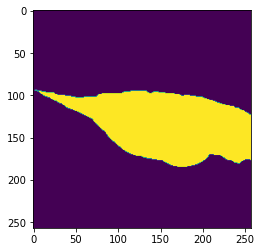

ipdb> plt.imshow(gt[0]); plt.pause(1)


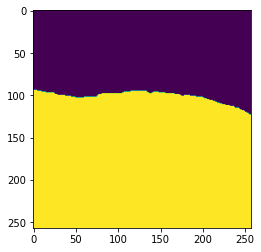

ipdb> up
> <ipython-input-68-bed6fd35eec4>(42)_name()
     38     rot_label = rot_label[ind].unsqueeze(0)
     39 #     rot_label, neuron_tensor = rotate(rot_label, rot_angle), \
     40 #                                 rotate(neuron_tensor, rot_angle)
     41     rot_label = rotate(rot_label, rot_angle)
---> 42     crop = crop_overlap(rot_label.squeeze(), gt)

ipdb> ind
1
ipdb> down
> <ipython-input-68-bed6fd35eec4>(18)crop_overlap()
     16     return_dict[rot_label[...,:y1].int().sum()] = [slice(None,y1), slice(None,None)]
     17     return_dict[rot_label[...,y2:].int().sum()] = [slice(y2,None), slice(None,None)]
---> 18     raise ValueError()
     19     return return_dict[max(return_dict.keys())]
     20 

ipdb> plt.imshow(rot_label[0]); plt.pause(1)


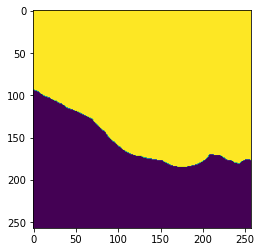

ipdb> x_any.squeeze()
tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True

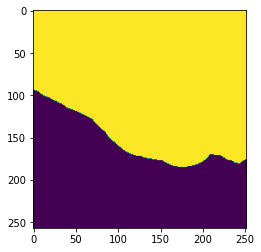

ipdb> x1
tensor(-5)
ipdb> plt.imshow(rot_label[...,:0][0]); plt.pause(1)


<stdin>:1: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.


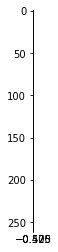

ipdb> rot_label[...,:0].sum()
tensor(0)
ipdb> up
> <ipython-input-68-bed6fd35eec4>(42)_name()
     38     rot_label = rot_label[ind].unsqueeze(0)
     39 #     rot_label, neuron_tensor = rotate(rot_label, rot_angle), \
     40 #                                 rotate(neuron_tensor, rot_angle)
     41     rot_label = rotate(rot_label, rot_angle)
---> 42     crop = crop_overlap(rot_label.squeeze(), gt)

ipdb> rot_angle
180
ipdb> exit


In [70]:
%debug

In [68]:
ir = rotate(index_label, 210)

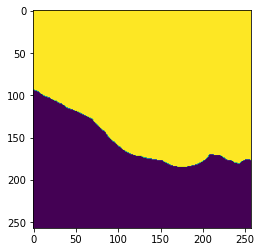

In [75]:
plt.imshow(ir[0,0])

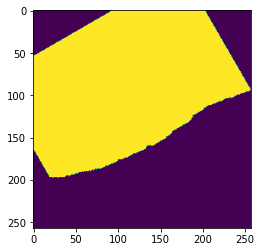

In [69]:
plt.imshow(ir[0,0])

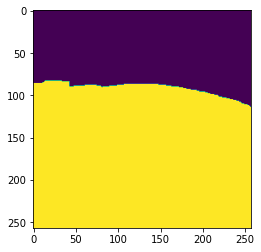

In [70]:
gt_dil = torch.tensor(binary_dilation(index_label.squeeze(), structure = generate_binary_structure(3,3), iterations=5))
plt.imshow(gt_dil[0])

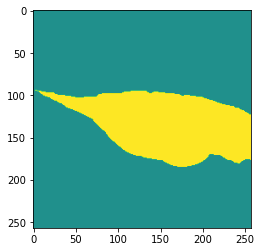

In [77]:
plt.imshow(ir[0,0].int() + index_label[0,0].int(),vmin=0)

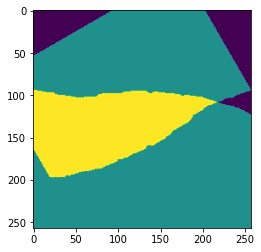

In [87]:
plt.imshow(ir[0,0].int() + index_label[0,0].int(),vmin=0)

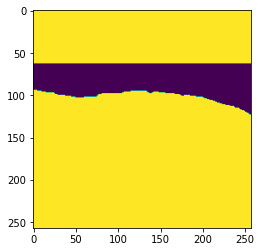

In [84]:
ir = ir.clone()
ir[...,63:,:] = 0
plt.imshow(ir[0,0].int() + index_label[0,0].int(),vmin=0)

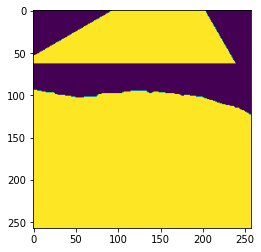

In [88]:
ir = ir.clone()
ir[...,63:,:] = 0
plt.imshow(ir[0,0].int() + index_label[0,0].int(),vmin=0)

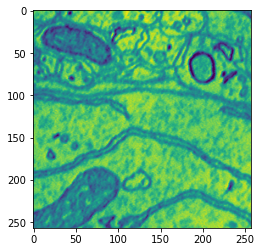

In [93]:
plt.imshow(arr[0])

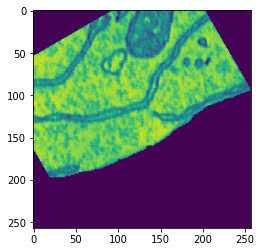

In [71]:
arr_neuron = arr * index_label[0]
arr_neuron = rotate(arr_neuron.unsqueeze(0), 210)
plt.imshow(arr_neuron[0,0])

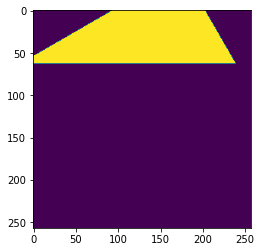

In [98]:
plt.imshow(ir[0,0])

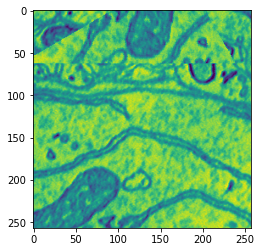

In [100]:
arr_neuron = arr_neuron.squeeze().clone()
arr_neuron[:,63:] = 0
plt.imshow((arr * (~ir[0]) + arr_neuron * ir[0])[0])

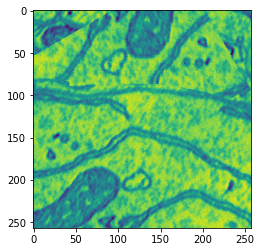

In [75]:
arr_neuron = arr_neuron.squeeze().clone()
arr_neuron[torch.where(gt_dil)] = 0
ir_new = ir.clone()[0]
ir_new[torch.where(gt_dil)] = False
plt.imshow((arr * (~ir_new) + arr_neuron * ir_new)[0])

# Augmentor

In [ ]:
import torch
import torchvision.transforms.functional as tf
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import imageio
gt_labels = imageio.volread('/n/home11/abanerjee/pytorch_connectomics/datasets/SNEMI3D/train-labels.tif')[:33, -257:, :257]
gt_labels = torch.tensor(np.cast[np.int16](gt_labels))
arr = imageio.volread('/n/home11/abanerjee/pytorch_connectomics/datasets/SNEMI3D/train-input.tif')[:33, -257:, :257]
arr = torch.tensor(arr)

In [39]:
from scipy.ndimage.morphology import binary_dilation
from scipy.ndimage.morphology import generate_binary_structure

class CopyPasteAugmentor(object):
    r"""Copy-paste augmentor (experimental).

    The input can be a `numpy.ndarray` or `torch.Tensor` of shape :math:`(B, C, Z, Y, X)`.
    
    Args:
        

    Examples::
        >>> from connectomics.data.augmentation import MixupAugmentor
        >>> mixup_augmentor = MixupAugmentor(num_aug=2)
        >>> volume = mixup_augmentor(volume)
        >>> pred = model(volume)
    """  
    def __init__(self, aug_thres=0.7):
        self.aug_thres = aug_thres
        self.dil_struct = generate_binary_structure(3,3)
        pass

    def __call__(self, volumes, labels):
        if not isinstance(volumes, (torch.Tensor, np.ndarray)):
            raise TypeError("Type {} is not supported in CopyPasteAugmentor".format(type(volumes)))
        
        labels, volumes = labels.bool(), volumes.clone()
        assert labels.ndim == 4 and volumes.ndim == 4
        for i,(volume, label) in enumerate(zip(volumes, labels)):
            label_flipped = label[torch.arange(label.shape[0]-1,-1,-1)]
            if label.float().mean() <= self.aug_thres: 
                print(label.float().mean())
                neuron_tensor = volume * label
                neuron_tensor, label = self.copy_paste_single(torch.stack([label, label_flipped]), neuron_tensor)
                volumes[i] = volume * (~label) + neuron_tensor * label
        return volumes
    
    def rotate(self, tensor, angle):
        c,z,y,x = tensor.shape
        rotated = tf.rotate(tensor.reshape(1,c*z,y,x), angle)
        return rotated.reshape(c,z,y,x)

    def crop_overlap(self, rot_label, gt, border=5):
        y_any = gt.any(dim=2).any(dim=0)
        x_any = gt.any(dim=1).any(dim=0)
        x1,x2,y1,y2 = *torch.where(x_any)[0][[0,-1]], *torch.where(y_any)[0][[0,-1]]
        x1,x2,y1,y2 = torch.clamp(x1-border,min=0),x2+border,torch.clamp(y1-border,min=0),y2+border
        
        return_dict = {}
        return_dict[rot_label[...,:x1].int().sum()] = [slice(None), slice(None,None), slice(x1, None)]
        return_dict[rot_label[...,x2:].int().sum()] = [slice(None), slice(None,None), slice(None, x2)]
        return_dict[rot_label[...,:y1].int().sum()] = [slice(None), slice(y1, None), slice(None,None)]
        return_dict[rot_label[...,y2:].int().sum()] = [slice(None), slice(None, y2), slice(None,None)]
        return return_dict[max(return_dict.keys())]
        
    def crop_overlap_dil(self, rot_label, gt, border=5):
        gt = torch.tensor(binary_dilation(gt, structure = self.dil_struct, iterations=border))
        return torch.where(gt)
    
    def distance(self, rot_label, orig_label, shape=None):
        orig_center = torch.stack(torch.where(orig_label)).float().mean(dim=-1)
        rot_center = torch.stack(torch.where(rot_label)).float().mean(dim=-1)
        if shape is not None:
            orig_center, rot_center = orig_center/torch.tensor(shape), rot_center/torch.tensor(shape)
        return ((rot_center-orig_center)**2).mean()
            
    def copy_paste_single(self, rot_label, neuron_tensor):
        '''
        Find rotation with least overlap with GT and if there are
        multiple rotations with no overlap, find one with least 
        distance from GT
        '''
        gt = rot_label[0]
        min_overlap = torch.logical_and(rot_label[1], gt).int().sum()
        min_dist = float('inf') if min_overlap else self.distance(rot_label[1], gt, gt.shape)
        rot_angle, crop, ind = 0, [slice(None,None), slice(None,None)], 1 
        for angle in range(30, 360, 30):
            rotated = self.rotate(rot_label, angle)
            overlap0, overlap1 = torch.logical_and(rotated[0] , gt).int().sum(), \
                        torch.logical_and(rotated[1] , gt).int().sum()
            if min(min_overlap, overlap0, overlap1) == min_overlap:
                rot_dist0, rot_dist1 = self.distance(rotated[0], gt, gt.shape), \
                            self.distance(rotated[1], gt, gt.shape)
                if overlap0 == 0 and rot_dist0 < min_dist:
                    min_dist = rot_dist0
                    rot_angle, ind = angle, 0
                if overlap1 == 0 and rot_dist1 < min_dist:
                    min_dist = rot_dist1
                    rot_angle, ind = angle, 1
            elif min(min_overlap, overlap0, overlap1) == overlap0:
                min_overlap = overlap0
                rot_angle, ind = angle, 0
            else:
                min_overlap = overlap1
                rot_angle, ind = angle, 1
        rot_label = rot_label[ind].unsqueeze(0)
        if ind:
            # flip
            neuron_tensor = neuron_tensor[torch.arange(neuron_tensor.shape[0]-1,-1,-1)]
        rot_label, neuron_tensor = self.rotate(rot_label, rot_angle).squeeze(0), \
                                    self.rotate(neuron_tensor.unsqueeze(0), rot_angle).squeeze(0)
        crop = self.crop_overlap_dil(rot_label.squeeze(), gt)
        neuron_tensor[crop[0],crop[1],crop[2]], rot_label[crop[0],crop[1],crop[2]] = 0, False
        return neuron_tensor, rot_label

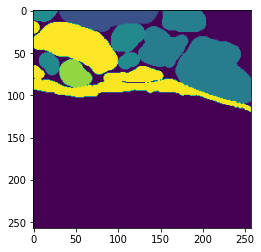

In [11]:
plt.imshow(gt_labels[0])

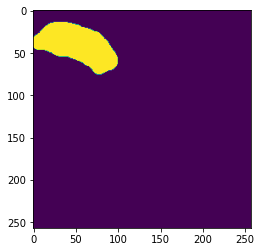

In [24]:
plt.imshow(gt_labels[0]==365)

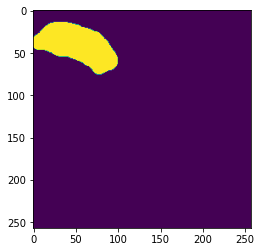

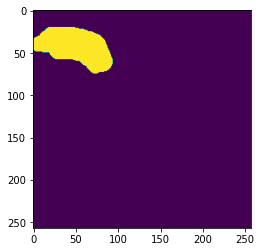

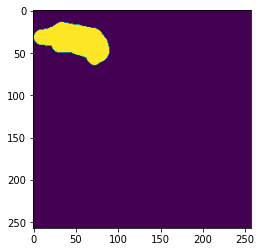

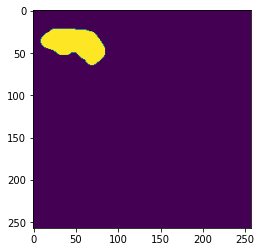

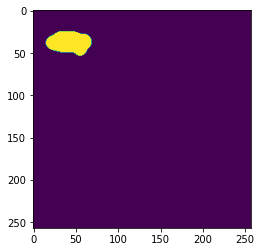

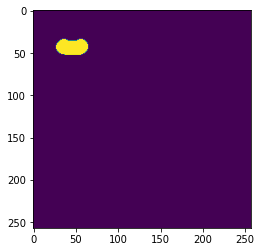

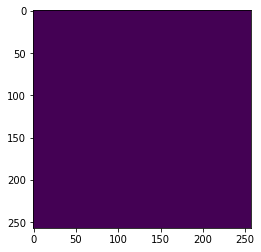

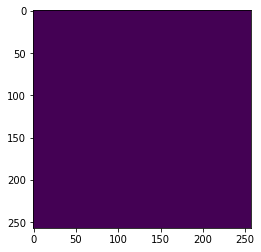

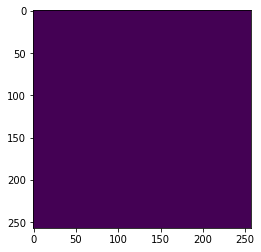

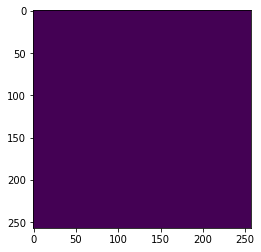

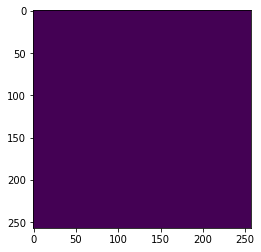

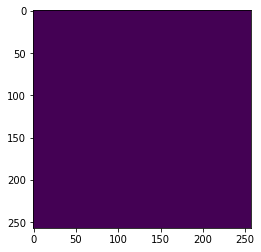

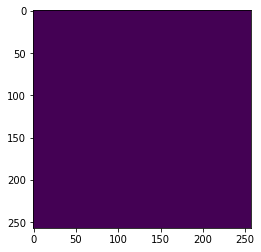

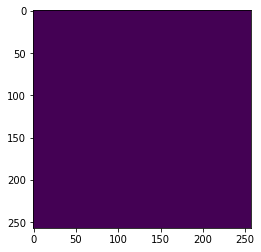

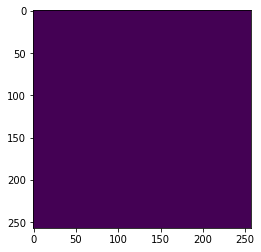

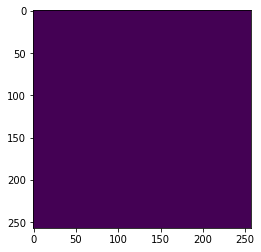

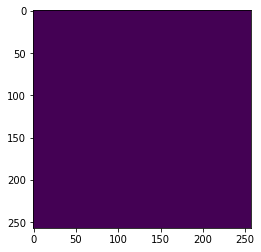

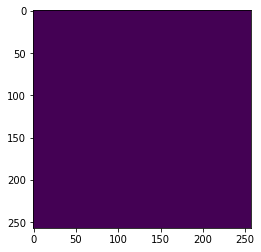

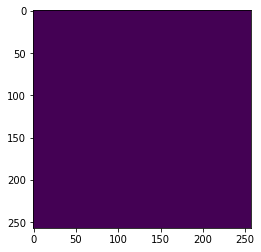

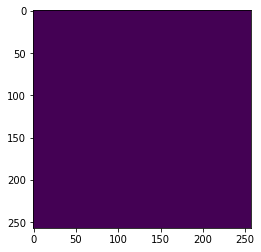

In [28]:
for i in range(20):
    plt.imshow(gt_labels[i]==365)
    plt.show()

In [12]:
np.unique(gt_labels[0])

array([  0,   1,   7,  91, 153, 154, 157, 173, 175, 176, 178, 307, 362,
       363, 364, 365, 366], dtype=int16)

In [40]:
index = 363
index_label = gt_labels==index
index_label = index_label.unsqueeze(0)

# y-rotate
c,z,y,x = index_label.shape
index_label_flipped = index_label[:,torch.arange(z-1,-1,-1)]

In [41]:
vol_new = CopyPasteAugmentor()(arr.unsqueeze(0), index_label)

tensor(0.0183)


tensor(0.0183)
> <ipython-input-20-380d4e99dd8d>(103)copy_paste_single()
    101         neuron_tensor[crop[0],crop[1],crop[2]], rot_label[crop[0],crop[1],crop[2]] = 0, False
    102         import ipdb; ipdb.set_trace()
--> 103         return neuron_tensor, rot_label

ipdb> neuron_tensor.sum()
tensor(5302313)
ipdb> np.unique(neuron_tensor)
array([  0,   1,   2,   3,   4,   9,  10,  11,  12,  16,  17,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       12

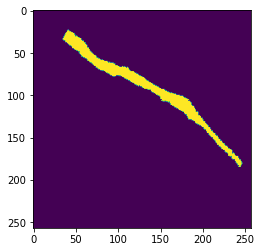

ipdb> plt.imshow(neuron_tensor[-1]), plt.pause(1)


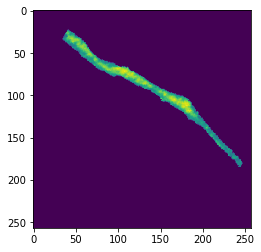

(<matplotlib.image.AxesImage object at 0x2abfed887ca0>, None)
ipdb> c


In [21]:
vol_new = CopyPasteAugmentor()(arr.unsqueeze(0), index_label)

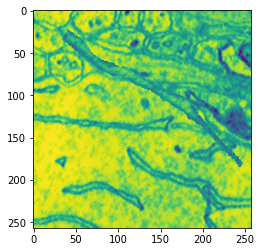

In [22]:
plt.imshow(vol_new[0,-1])

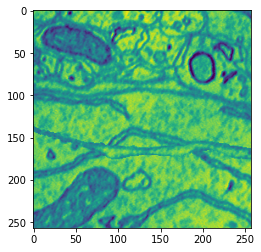

In [43]:
plt.imshow(vol_new[0,0])

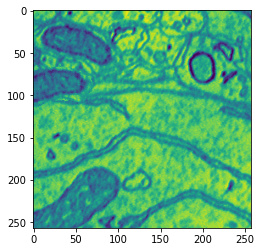

In [38]:
plt.imshow(vol_new[0,0])

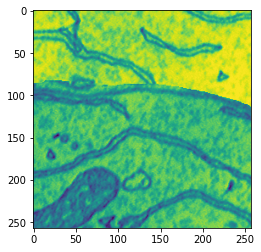

In [63]:
plt.imshow(vol_new[0,0])

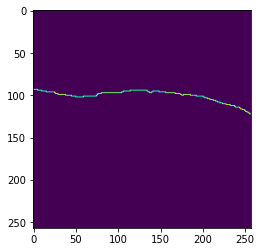

In [22]:
from scipy.ndimage.morphology import binary_dilation
plt.imshow(torch.tensor(binary_dilation(index_label.squeeze(), structure = generate_binary_structure(3,5)))[0] & ~index_label.squeeze()[0])

In [76]:
diff = torch.tensor(binary_dilation(index_label.squeeze(), structure = generate_binary_structure(3,3), iterations=5))[0] & ~index_label.squeeze()[0]

In [77]:
diff.int().sum(dim=0)

tensor([ 8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 11, 11, 12, 13, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 14, 15, 16, 16, 16, 17, 17, 17, 17, 17, 16, 16,
        16, 16, 17, 17, 17, 17, 17, 11, 11, 12, 12, 12, 13, 13, 14, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        14, 14, 14, 12, 11, 10, 10, 10,  9,  7,  8,  8,  8,  8,  8,  8,  8,  8,
         9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  9, 10, 10, 11, 11, 11, 10, 10,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,  9,  9,  9,  9,  9,
         9,  8,  8,  8,  8,  9,  9,  9,  9,  9,  8,  9,  9, 10, 10,  9,  8,  8,
         8,  7,  7,  7,  7,  8,  7,  7,  7,  7,  7,  7,  8,  7,  7,  7,  6,  6,
         6,  6,  7,  7,  8,  7,  7,  8,  7,  7,  8,  7,  7,  7,  8,  8,  7,  8,
         8,  9,  8,  7,  8,  8,  8,  8, 

In [31]:
diff.int().sum(dim=0)

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
        1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1,
        1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
        1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1,
        1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1])

In [41]:
torch.where(index_label.squeeze())

(tensor([ 0,  0,  0,  ..., 32, 32, 32]),
 tensor([ 94,  94,  94,  ..., 256, 256, 256]),
 tensor([  0,   1,   2,  ..., 254, 255, 256]))